<a href="https://colab.research.google.com/github/kishore145/intersting-problems/blob/master/csse_covid_19_daily_reports_world_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective


1.   Find all the metrics or analysis from the data set, please do go as detailed as possible. 

---  

2.   After submission of the above analysis, kindly do the below mentioned set of analysis as well.  
*   Graphing the number of confirmed cases, active cases, deaths, recoveries, mortality rate (CFR), and recovery rate  
*   World Daily Increases in confirmed cases, confirmed deaths, confirmed recoveries (Graph)  
*   Log of cases over time, log of death over time, log of corona recoveries over time
*   Country Specific Graphs
*   Country specific Cases, death, recoveries graph
*   Do a prediction for confirmed cases over worldwide (you can use external factors from the internet, do mention the source)
*   Prediction of Recoveries, Deaths as well 

All graphs should contain Pie Chart, Bar Chart, Normal Graph too


---

# Import dependencies

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 30)

# Set default font size
plt.rcParams['font.size'] = 10

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 1)


# Read Data Files

In [35]:
# Set path to files:
base_path = ''

In [36]:
# Read case details
world_cases = pd.read_csv(base_path + 'csse_daily.csv')
world_cases.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,45001.0,Abbeville,South Carolina,US,2020-07-13 04:43:04,34.223334,-82.461707,153,1,0,152.0,"Abbeville, South Carolina, US",623.802340,0.653595
1,22001.0,Acadia,Louisiana,US,2020-07-13 04:43:04,30.295065,-92.414197,1339,45,0,1294.0,"Acadia, Louisiana, US",2158.111048,3.360717
2,51001.0,Accomack,Virginia,US,2020-07-13 04:43:04,37.767072,-75.632346,1042,14,0,1028.0,"Accomack, Virginia, US",3224.408962,1.343570
3,16001.0,Ada,Idaho,US,2020-07-13 04:43:04,43.452658,-116.241552,4146,25,0,4121.0,"Ada, Idaho, US",860.903637,0.602991
4,19001.0,Adair,Iowa,US,2020-07-13 04:43:04,41.330756,-94.471059,17,0,0,17.0,"Adair, Iowa, US",237.695749,0.000000


Data looks like it's taken from JHU CSSE COVID-19 Dataset  
For field defenitions and details, refer : https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data#jhu-csse-covid-19-dataset

## [Daily reports (csse_covid_19_daily_reports)](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports)

This folder contains daily case reports. All timestamps are in UTC (GMT+0).

### File naming convention
MM-DD-YYYY.csv in UTC.

### Field description
* <b>FIPS</b>: US only. Federal Information Processing Standards code that uniquely identifies counties within the USA.
* <b>Admin2</b>: County name. US only.
* <b>Province_State</b>: Province, state or dependency name.
* <b>Country_Region</b>: Country, region or sovereignty name. The names of locations included on the Website correspond with the official designations used by the U.S. Department of State.
* <b>Last Update</b>: MM/DD/YYYY HH:mm:ss  (24 hour format, in UTC).
* <b>Lat</b> and <b>Long_</b>: Dot locations on the dashboard. All points (except for Australia) shown on the map are based on geographic centroids, and are not representative of a specific address, building or any location at a spatial scale finer than a province/state. Australian dots are located at the centroid of the largest city in each state.
* <b>Confirmed</b>: Counts include confirmed and probable (where reported).
* <b>Deaths</b>: Counts include confirmed and probable (where reported).
* <b>Recovered</b>: Recovered cases are estimates based on local media reports, and state and local reporting when available, and therefore may be substantially lower than the true number. US state-level recovered cases are from [COVID Tracking Project](https://covidtracking.com/).
* <b>Active:</b> Active cases = total cases - total recovered - total deaths.
* <b>Incidence_Rate</b>: Incidence Rate = cases per 100,000 persons.
* <b>Case-Fatality Ratio (%)</b>: Case-Fatality Ratio (%) = Number recorded deaths / Number cases.

### Update frequency
* Since June 15, We are moving the update time forward to occur between 04:45 and 05:15 GMT to accommodate daily updates from India's Ministry of Health and Family Welfare.
* Files on and after April 23, once per day between 03:30 and 04:00 UTC. 
* Files from February 2 to April 22: once per day around 23:59 UTC.
* Files on and before February 1: the last updated files before 23:59 UTC. Sources: [archived_data](https://github.com/CSSEGISandData/COVID-19/tree/master/archived_data) and dashboard.

### Data sources
Refer to the [mainpage](https://github.com/CSSEGISandData/COVID-19).

### Why create this new folder?
1. Unifying all timestamps to UTC, including the file name and the "Last Update" field.
2. Pushing only one file every day.
3. All historic data is archived in [archived_data](https://github.com/CSSEGISandData/COVID-19/tree/master/archived_data).


## Let's Look at Covid-19 data provided

# Data Clearning

In [37]:
# Quick review of the data 
print(f'Number of rows in world cases: {len(world_cases)}')
world_cases.head(10)

Number of rows in world cases: 3813


,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,45001.0,Abbeville,South Carolina,US,2020-07-13 04:43:04,34.223334,-82.461707,153,1,0,152.0,"Abbeville, South Carolina, US",623.802340,0.653595
1,22001.0,Acadia,Louisiana,US,2020-07-13 04:43:04,30.295065,-92.414197,1339,45,0,1294.0,"Acadia, Louisiana, US",2158.111048,3.360717
2,51001.0,Accomack,Virginia,US,2020-07-13 04:43:04,37.767072,-75.632346,1042,14,0,1028.0,"Accomack, Virginia, US",3224.408962,1.343570
3,16001.0,Ada,Idaho,US,2020-07-13 04:43:04,43.452658,-116.241552,4146,25,0,4121.0,"Ada, Idaho, US",860.903637,0.602991
4,19001.0,Adair,Iowa,US,2020-07-13 04:43:04,41.330756,-94.471059,17,0,0,17.0,"Adair, Iowa, US",237.695749,0.000000
5,21001.0,Adair,Kentucky,US,2020-07-13 04:43:04,37.104598,-85.281297,142,19,0,123.0,"Adair, Kentucky, US",739.506301,13.380282
6,29001.0,Adair,Missouri,US,2020-07-13 04:43:04,40.190586,-92.600782,100,0,0,100.0,"Adair, Missouri, US",394.586276,0.000000
7,40001.0,Adair,Oklahoma,US,2020-07-13 04:43:04,35.884942,-94.658593,137,4,0,133.0,"Adair, Oklahoma, US",617.283951,2.919708
8,8001.0,Adams,Colorado,US,2020-07-13 04:43:04,39.874321,-104.336258,4757,158,0,4599.0,"Adams, Colorado, US",919.367401,3.321421
9,16003.0,Adams,Idaho,US,2020-07-13 04:43:04,44.893336,-116.454525,12,0,0,12.0,"Adams, Idaho, US",279.459711,0.000000


In [38]:
world_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3813 entries, 0 to 3812
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3131 non-null   float64
 1   Admin2               3135 non-null   object 
 2   Province_State       3644 non-null   object 
 3   Country_Region       3813 non-null   object 
 4   Last_Update          3813 non-null   object 
 5   Lat                  3739 non-null   float64
 6   Long_                3739 non-null   float64
 7   Confirmed            3813 non-null   int64  
 8   Deaths               3813 non-null   int64  
 9   Recovered            3813 non-null   int64  
 10  Active               3809 non-null   float64
 11  Combined_Key         3813 non-null   object 
 12  Incidence_Rate       3739 non-null   float64
 13  Case-Fatality_Ratio  3762 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 417.2+ KB


In [39]:
# Function to convert column datatype
def cconvert(df, ctype, columns):
  for col in list(df.columns):
    # Select columns that should be changed
    if (col in columns):
      # Convert the data type to passed data type
      df[col] = df[col].astype(ctype)

In [40]:
world_cases.describe()

,FIPS,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incidence_Rate,Case-Fatality_Ratio
count,3131.000000,3739.000000,3739.000000,3813.000000,3813.000000,3.813000e+03,3809.000000,3739.000000,3762.000000
mean,31359.889812,36.215246,-72.370231,3385.879098,149.259900,1.866498e+03,1383.469415,598.593082,3.439586
std,16985.179864,12.761754,53.459971,17225.415049,1147.628693,1.986030e+04,18131.156162,796.913032,44.140338
min,66.000000,-52.368000,-174.159600,0.000000,0.000000,0.000000e+00,-960967.000000,0.000000,0.000000
25%,19008.000000,33.606456,-96.534476,35.000000,0.000000,0.000000e+00,28.000000,149.010639,0.000000
50%,29199.000000,38.004509,-87.268034,158.000000,3.000000,0.000000e+00,128.000000,348.432056,1.412590
75%,46050.000000,42.133698,-78.470590,923.000000,22.000000,0.000000e+00,615.000000,757.823037,3.894841
max,99999.000000,71.706900,178.065000,371997.000000,40234.000000,1.006326e+06,209276.000000,13381.779511,2700.000000


In [41]:
# Function to calculate missing values by column picked from stack overflow
# https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe/39734251#39734251
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [42]:
missing_values_table(world_cases)

Your selected dataframe has 14 columns.
There are 8 columns that have missing values.


,Missing Values,% of Total Values
FIPS,682,17.9
Admin2,678,17.8
Province_State,169,4.4
Lat,74,1.9
Long_,74,1.9
Incidence_Rate,74,1.9
Case-Fatality_Ratio,51,1.3
Active,4,0.1


For country level analysis that we are intenting with this data sheet, we don't need FIPS, Admin2, Province_State and hence we can drop them.  

Also let's look at the cases where Active is Null

In [43]:
# Looking at raw data where Active is Null
world_cases[world_cases['Active'].isnull()]


,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
2800,90004.0,Unassigned,Arizona,US,2020-07-13 04:43:04,NaN,NaN,0,1,0,NaN,"Unassigned, Arizona, US",NaN,NaN
2812,90020.0,Unassigned,Kansas,US,2020-07-13 04:43:04,NaN,NaN,0,1,0,NaN,"Unassigned, Kansas, US",NaN,NaN
3248,NaN,NaN,Diamond Princess,Canada,2020-07-13 04:43:04,NaN,NaN,0,1,0,NaN,"Diamond Princess, Canada",NaN,NaN
3402,NaN,NaN,Melilla,Spain,2020-07-13 04:43:04,35.2923,-2.9381,126,2,125,NaN,"Melilla, Spain",148.779653,1.587302


In [44]:
# Dropping these values from analysis as there is data inconsitency
world_cases.drop([2800,2812,3248,3402], inplace=True)
world_cases[world_cases['Active'].isnull()]

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio


In [45]:
# Dropping unnecessary columns and reducing data granularity to country level
world_cases.drop(labels = ['FIPS','Admin2','Province_State','Lat','Long_', 'Combined_Key', 'Last_Update'], axis = 1, inplace = True)
world_cases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3809 entries, 0 to 3812
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country_Region       3809 non-null   object 
 1   Confirmed            3809 non-null   int64  
 2   Deaths               3809 non-null   int64  
 3   Recovered            3809 non-null   int64  
 4   Active               3809 non-null   float64
 5   Incidence_Rate       3738 non-null   float64
 6   Case-Fatality_Ratio  3761 non-null   float64
dtypes: float64(3), int64(3), object(1)
memory usage: 238.1+ KB


In [46]:
# Groupby data to reduce granularity to Country Level

def cr(x):
    return round(np.mean(x),5)


# Alternative: Since the NamedAgg is just a tuple, we can also pass regular tuples
aggregation = {
    'Entries_aggregated': ('Confirmed', 'size'),
    'Confirmed': ('Confirmed','sum'),
    'Deaths': ('Deaths','sum'),
    'Recovered': ('Recovered','sum'),
    'Active': ('Active','sum'),
    'Incidence_Rate': ('Incidence_Rate',cr),
    'Case-Fatality_Ratio': ('Case-Fatality_Ratio',cr)
}
world_cases_country = world_cases.groupby('Country_Region').agg(**aggregation)
world_cases_country

,Entries_aggregated,Confirmed,Deaths,Recovered,Active,Incidence_Rate,Case-Fatality_Ratio
Country_Region,,,,,,,
Afghanistan,1,34451,1010,21216,12225.0,88.49851,2.93170
Albania,1,3454,93,1946,1415.0,120.02224,2.69253
Algeria,1,19195,1011,13743,4441.0,43.77319,5.26700
Andorra,1,855,52,803,0.0,1106.58125,6.08187
Angola,1,506,26,118,362.0,1.53957,5.13834
...,...,...,...,...,...,...,...
West Bank and Gaza,1,6230,36,942,5252.0,122.12296,0.57785
Western Sahara,1,10,1,8,1.0,1.67412,10.00000
Yemen,1,1465,417,659,389.0,4.91183,28.46416


In [47]:
# Review sample o/p
world_cases_country.loc['US':]

,Entries_aggregated,Confirmed,Deaths,Recovered,Active,Incidence_Rate,Case-Fatality_Ratio
Country_Region,,,,,,,
US,3140,3304942,135203,1006326,2208772.0,658.09949,3.40650
Uganda,1,1025,0,972,53.0,2.24088,0.00000
Ukraine,27,54647,1400,26971,26276.0,136.02165,2.39794
United Arab Emirates,1,54854,333,45140,9381.0,554.61862,0.60707
United Kingdom,15,291154,44904,1378,244872.0,303.91278,6.72880
Uruguay,1,987,31,896,60.0,28.41329,3.14083
Uzbekistan,1,12997,60,7852,5085.0,38.83272,0.46164
Venezuela,1,9465,89,2671,6705.0,33.28534,0.94031
Vietnam,1,372,0,350,22.0,0.38217,0.00000


# Exploratory Data Analysis

Text(0.5, 1.0, 'Covid Confrimed Distribution in millions')

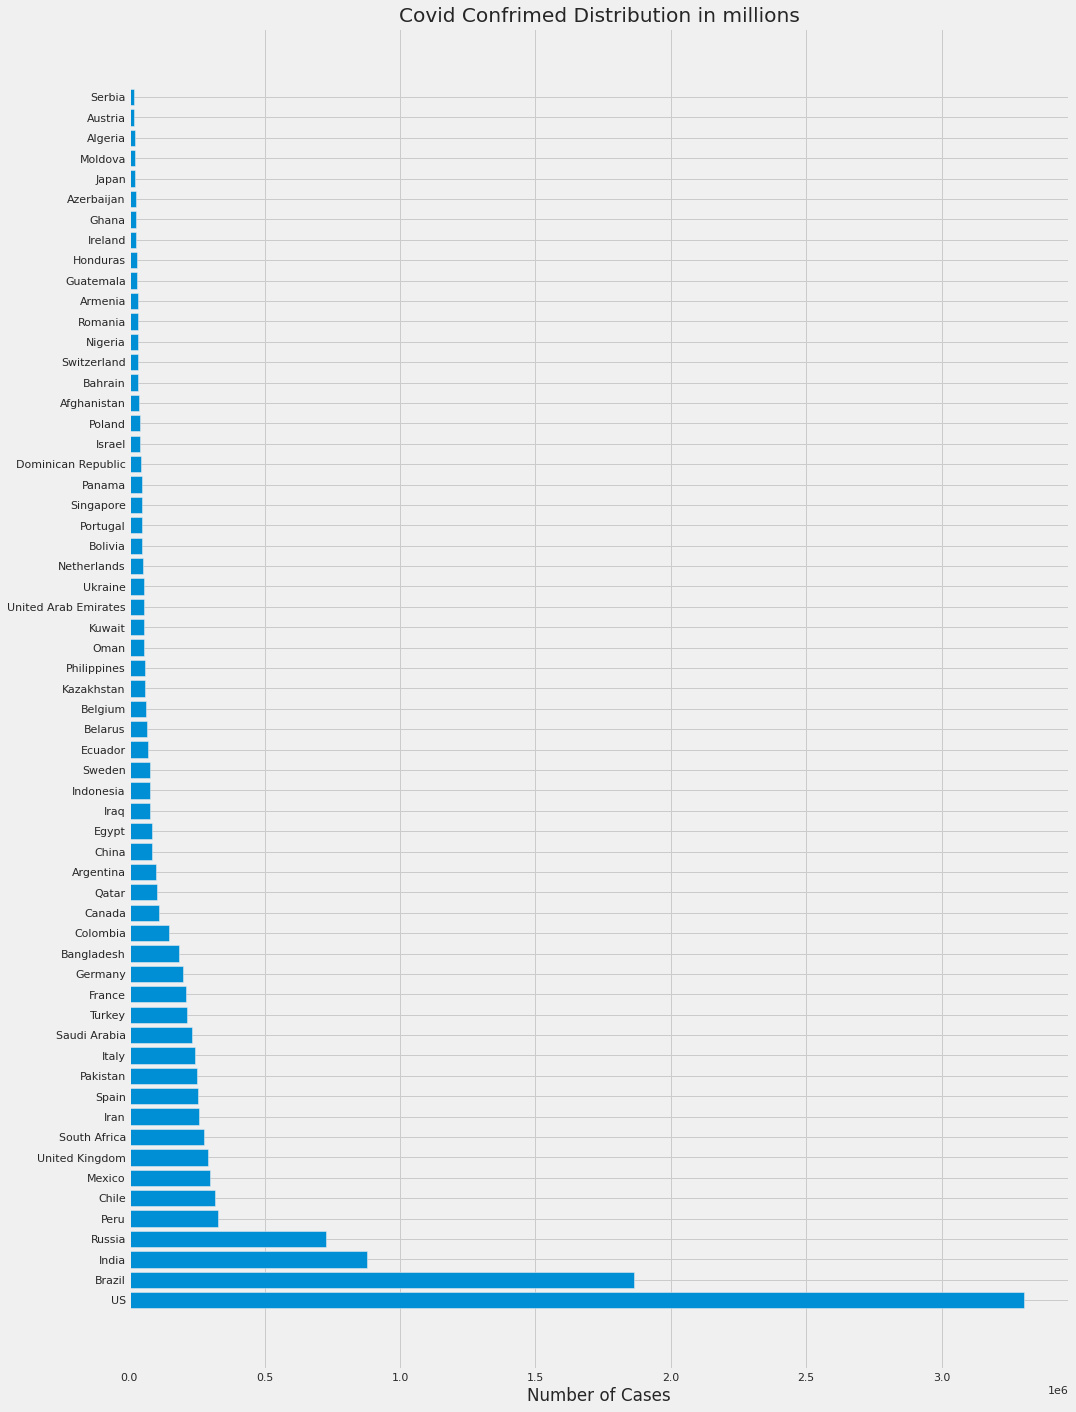

In [48]:
# Plotting Covid Confirmed Distribution
figsize(15, 23)

# Bar chart of Covid Confirmed Cases
plt.style.use('fivethirtyeight')
Xy = world_cases_country[['Confirmed']].copy()

Xy.sort_values(by = 'Confirmed', na_position='first', ascending = False, inplace = True)
# Limiting graph to top 60 countries
Xy = Xy[:60]

plt.barh(Xy.index, Xy['Confirmed'] )
plt.xlabel('Number of Cases'); 
plt.title('Covid Confrimed Distribution in millions')


In [49]:
Xy.sort_values(by = 'Confirmed', na_position='first', ascending = False, inplace = True)

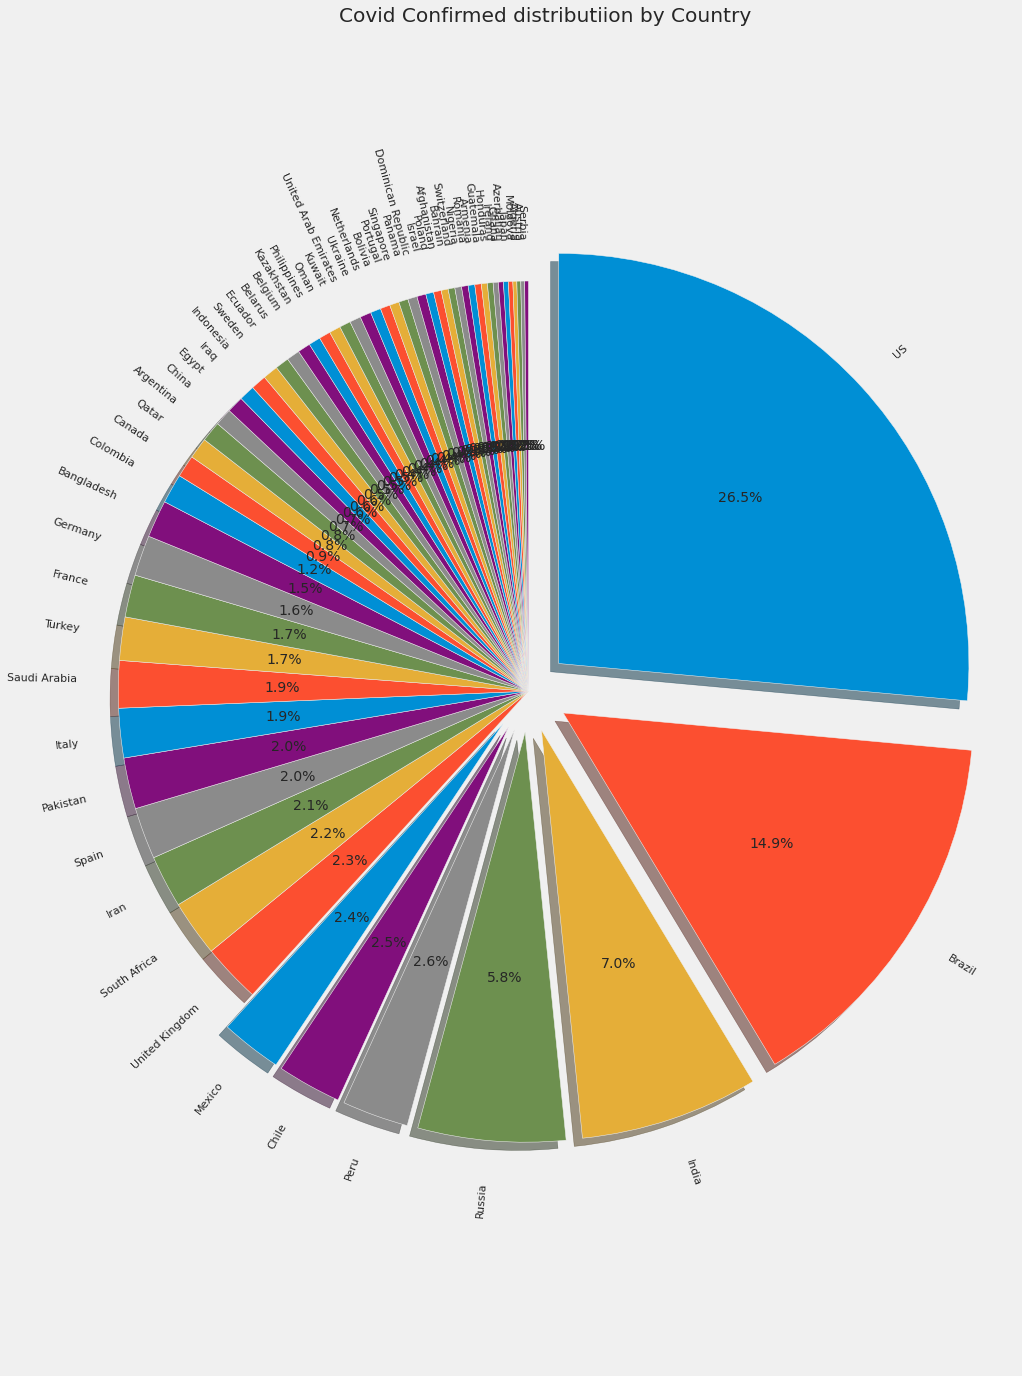

In [50]:
# Pie chart, where the slices will be ordered and plotted clockwise:
labels = Xy.index
sizes = Xy['Confirmed']

explode = [0.1 if i < 7 else 0 for i in range(len(Xy))]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, rotatelabels = True, counterclock = False)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Covid Confirmed distributiion by Country')
plt.show()

As is evident from above two graphs, 4 countries account for more than 50% of confirmed cases.

Text(0.5, 1.0, 'Covid Recovered Distribution')

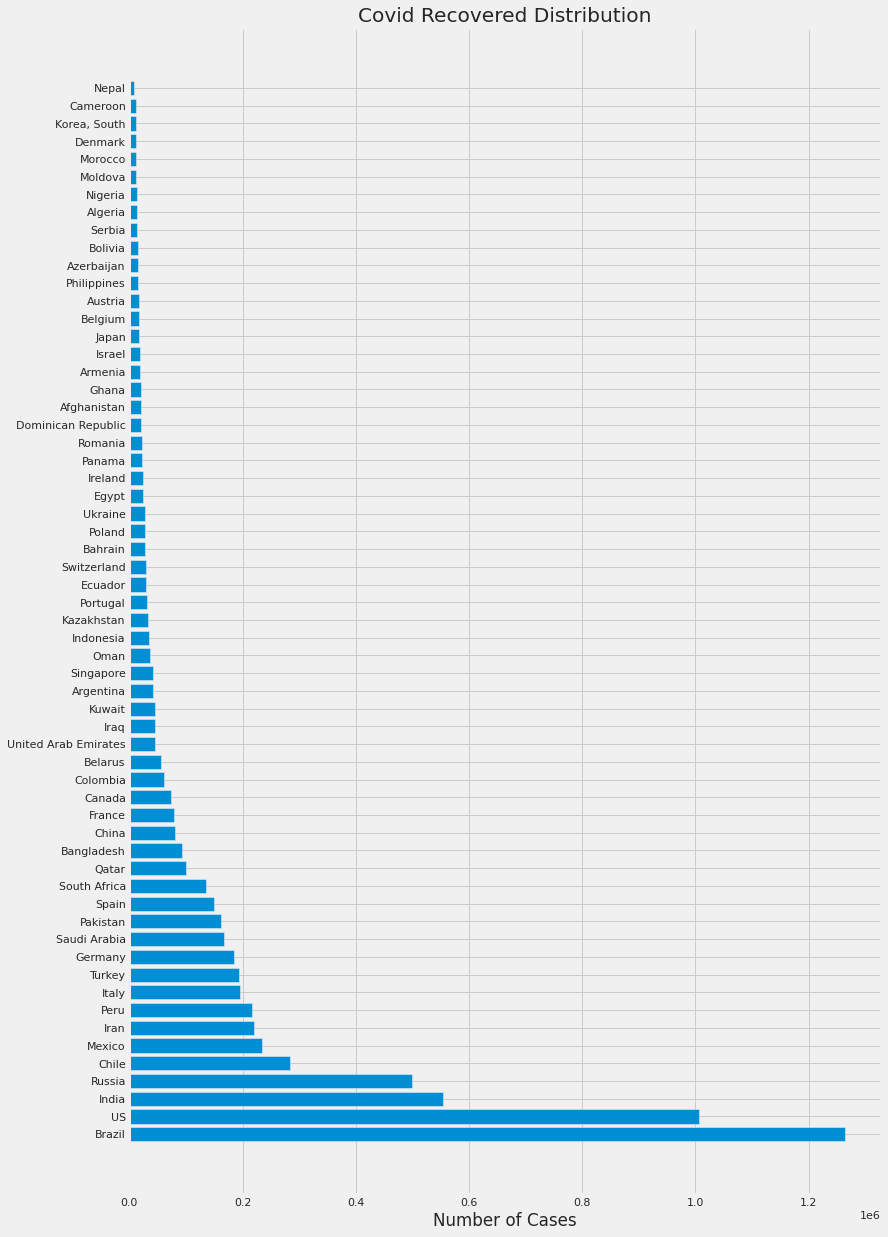

In [51]:
figsize(12, 20)

# Bar chart of Covid Recovered Cases
plt.style.use('fivethirtyeight')
Xy = world_cases_country[['Recovered']].copy()

Xy.sort_values(by = 'Recovered', na_position='first', ascending = False , inplace = True)
# Limiting graph to top 60 countries
Xy = Xy[:60]

plt.barh(Xy.index, Xy['Recovered'] )
plt.xlabel('Number of Cases')
plt.title('Covid Recovered Distribution')

In [52]:
Xy.sort_values(by = 'Recovered', na_position='first', ascending = False, inplace = True)

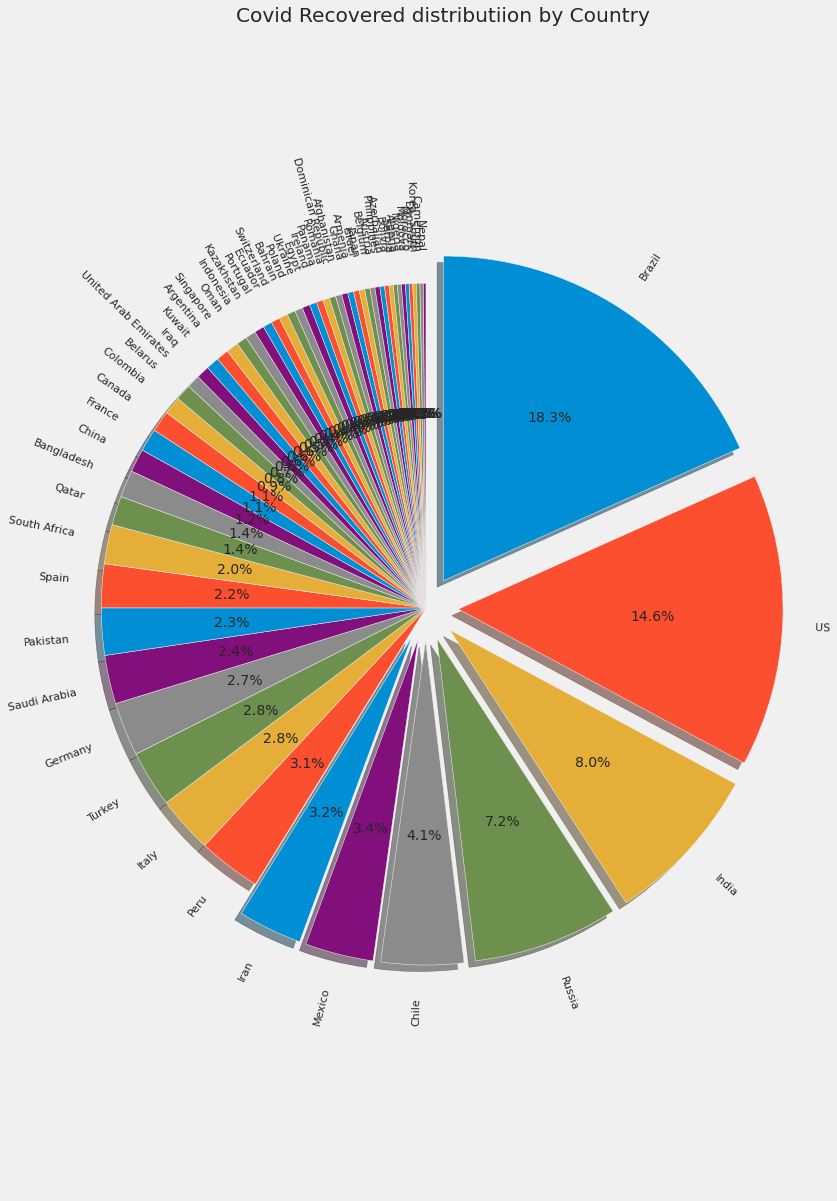

In [53]:
# Pie chart, where the slices will be ordered and plotted clockwise:
Xy.dropna(inplace = True)
labels = Xy.index
sizes = Xy['Recovered']

explode = [0.1 if i < 7 else 0 for i in range(len(Xy))]
#print(explode)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, rotatelabels = True, counterclock = False)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Covid Recovered distributiion by Country')
plt.show()

The graph follows similar trajectory as confirmed cases

Text(0.5, 1.0, 'Covid Deaths Distribution')

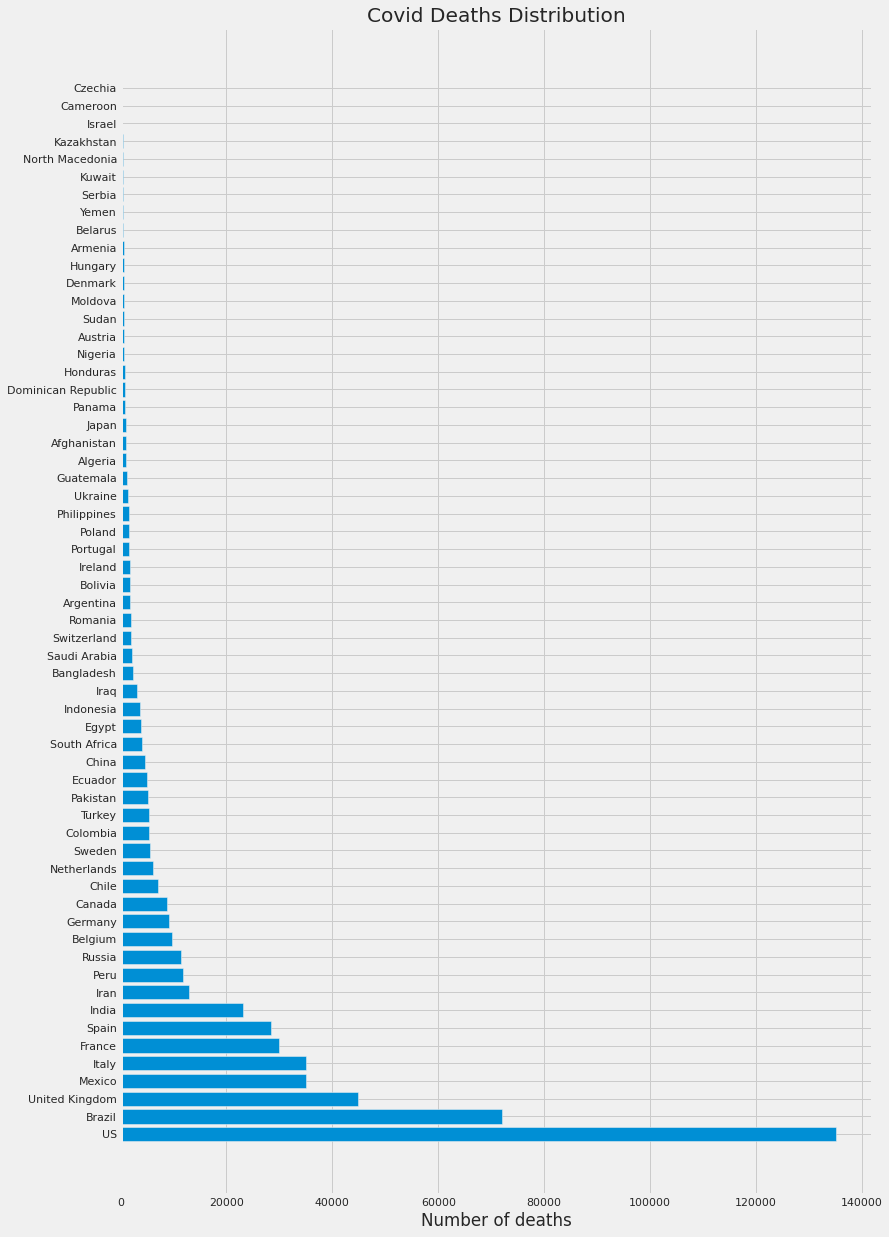

In [55]:
# Plotting Deaths
figsize(12, 20)

# Bar chart of Covid Deaths 
plt.style.use('fivethirtyeight')
Xy = world_cases_country[['Deaths']].copy()
#print(Xy.head())
Xy.sort_values(by = 'Deaths', na_position='first', ascending = False, inplace = True)
Xy = Xy[:60]
plt.barh(Xy.index, Xy['Deaths'] )
plt.xlabel('Number of deaths') 
plt.title('Covid Deaths Distribution')

In [56]:
Xy.sort_values(by = 'Deaths', na_position='first', ascending = False, inplace = True)

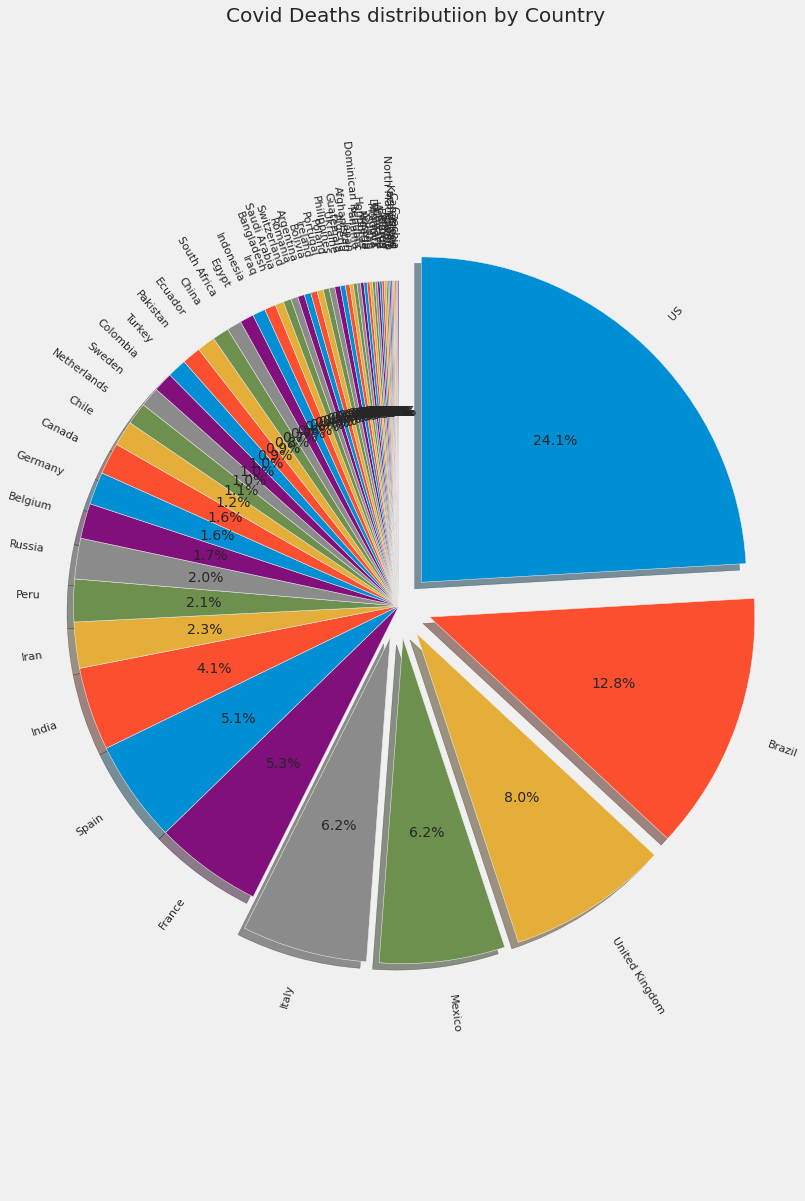

In [57]:
# Pie chart, where the slices will be ordered and plotted clockwise:
Xy.dropna(inplace = True)
labels = Xy.index
sizes = Xy['Deaths']

explode = [0.1 if i < 5 else 0 for i in range(len(Xy))]
#print(explode)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, rotatelabels = True, counterclock = False)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Covid Deaths distributiion by Country')
plt.show()

US is the worst hit country w.r.t. Covid related death toll.

Text(0.5, 1.0, 'Covid Active Cases Distribution')

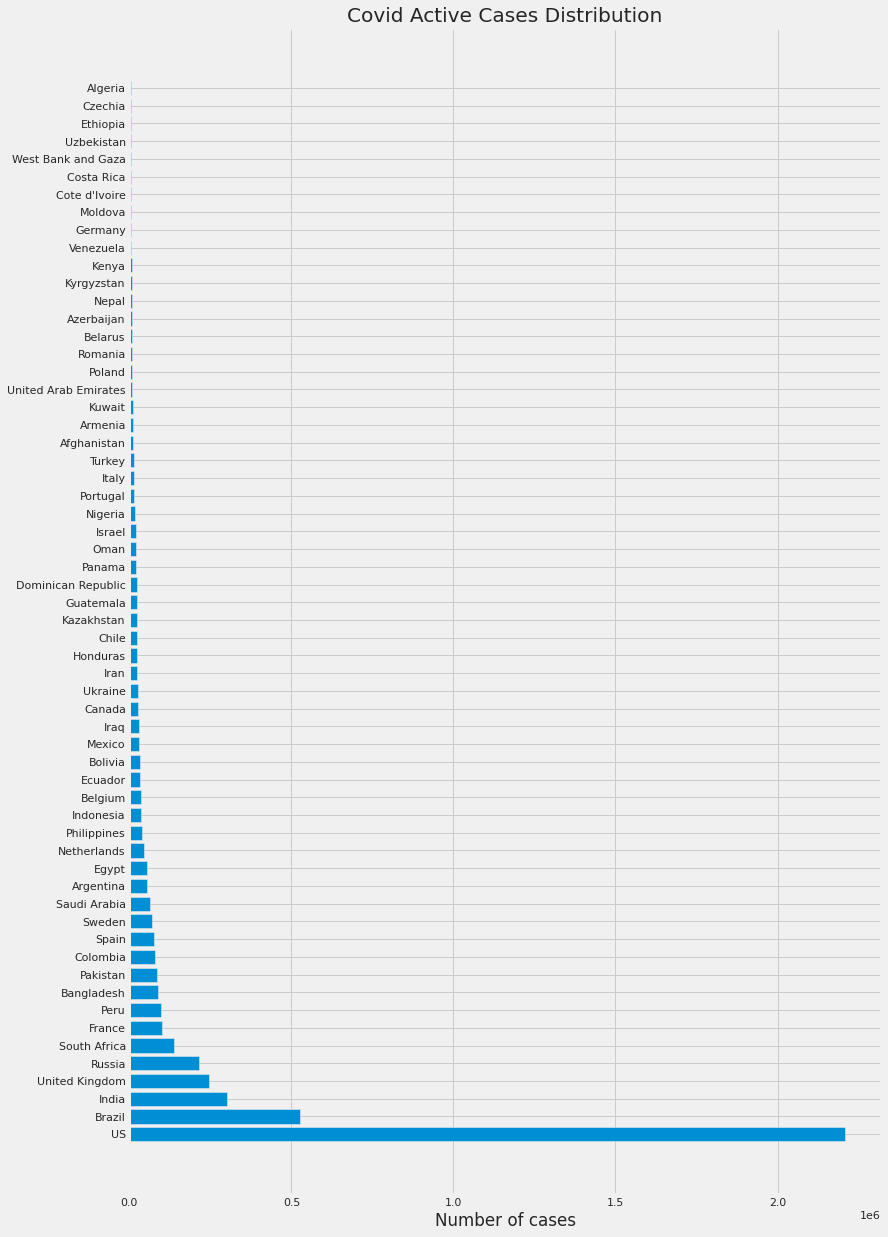

In [59]:
# Plotting Active cases
figsize(12, 20)

# Bar chart of Covid Active Cases 
plt.style.use('fivethirtyeight')
Xy = world_cases_country[['Active']].copy()

Xy.sort_values(by = 'Active', na_position='first', ascending = False, inplace = True)
Xy = Xy[:60]
plt.barh(Xy.index, Xy['Active'] )
plt.xlabel('Number of cases') 
plt.title('Covid Active Cases Distribution')

In [60]:
Xy.sort_values(by = 'Active', na_position='first', ascending = False, inplace = True)

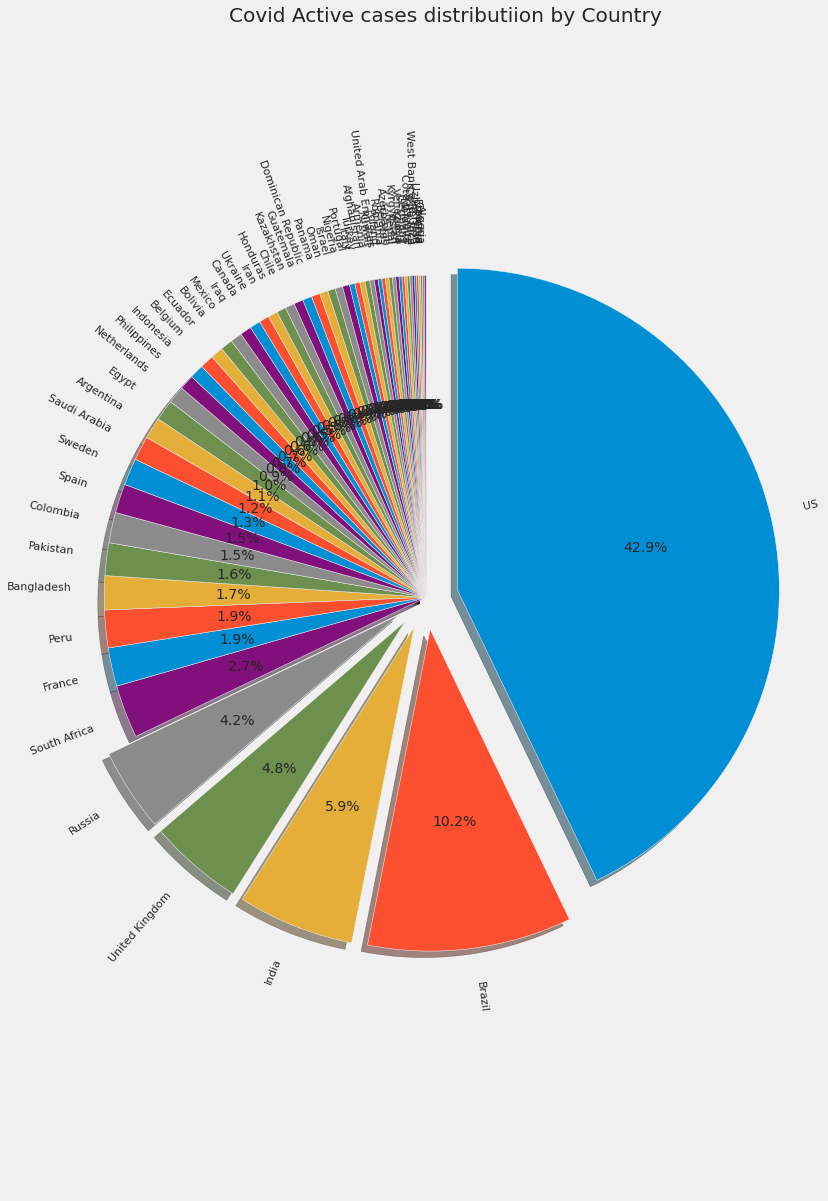

In [61]:
# Pie chart, where the slices will be ordered and plotted clockwise:
Xy.dropna(inplace = True)
labels = Xy.index
sizes = Xy['Active']

explode = [0.1 if i < 5 else 0 for i in range(len(Xy))]
#print(explode)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, rotatelabels = True, counterclock = False)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Covid Active cases distributiion by Country')
plt.show()

Same story follows for Active covid cases where top 3 states account for more than 50% of active covid cases as well. 

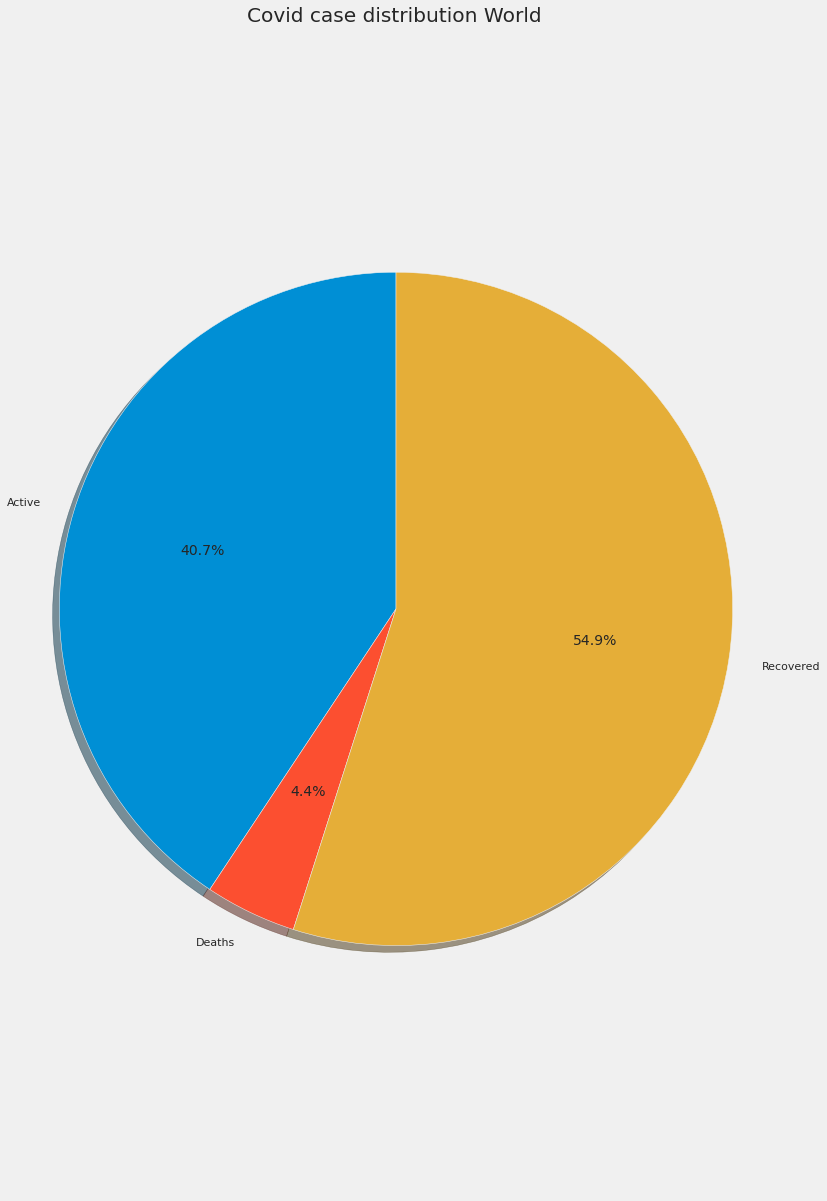

In [62]:
# Looking at overall case values for World
covid_cases = world_cases_country.sum(numeric_only=True).get(key = ['Active', 'Deaths', 'Recovered'])

fig1, ax1 = plt.subplots()
ax1.pie(covid_cases.array, labels=covid_cases.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax1.set_title('Covid case distribution World')
plt.show()

Looking at the overall data, it is evident that the pandemic is still still active, but there are signs of recovery with Recovered percentage up at ~55%

These metrics are overall and mortality rate may have come down in recent months which will be evident when we do a time series analysis on the data. 

Let's look at other relevant metrics and see how they change per state. 

* <b>Incident_Rate</b> - cases per 100,000 persons.
* <b>Case-Fatality_Ratio</b> - - Number recorded deaths * 100/ Number confirmed cases.


Text(0.5, 1.0, 'Incidence Rate')

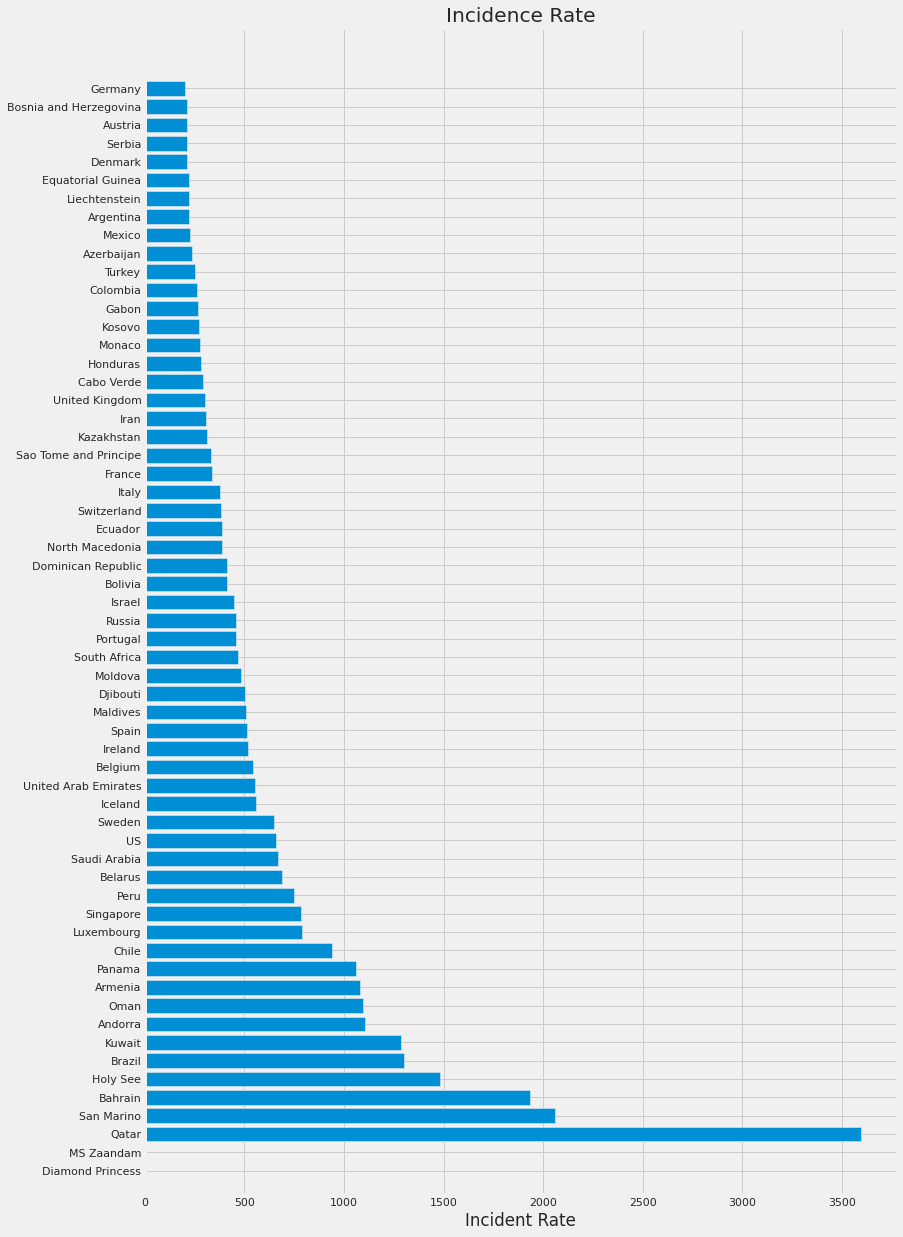

In [69]:
# Plotting Incident Rate
figsize(12, 20)

# Bar chart of People Tested 
plt.style.use('fivethirtyeight')
Xy = world_cases_country[['Incidence_Rate']].copy()

Xy.sort_values(by = 'Incidence_Rate', na_position='first', ascending = False, inplace = True)
Xy = Xy[:60]

plt.barh(Xy.index, Xy['Incidence_Rate'] )
plt.xlabel('Incident Rate') 
plt.title('Incidence Rate')

Text(0.5, 1.0, 'Case-Fatality_Ratio')

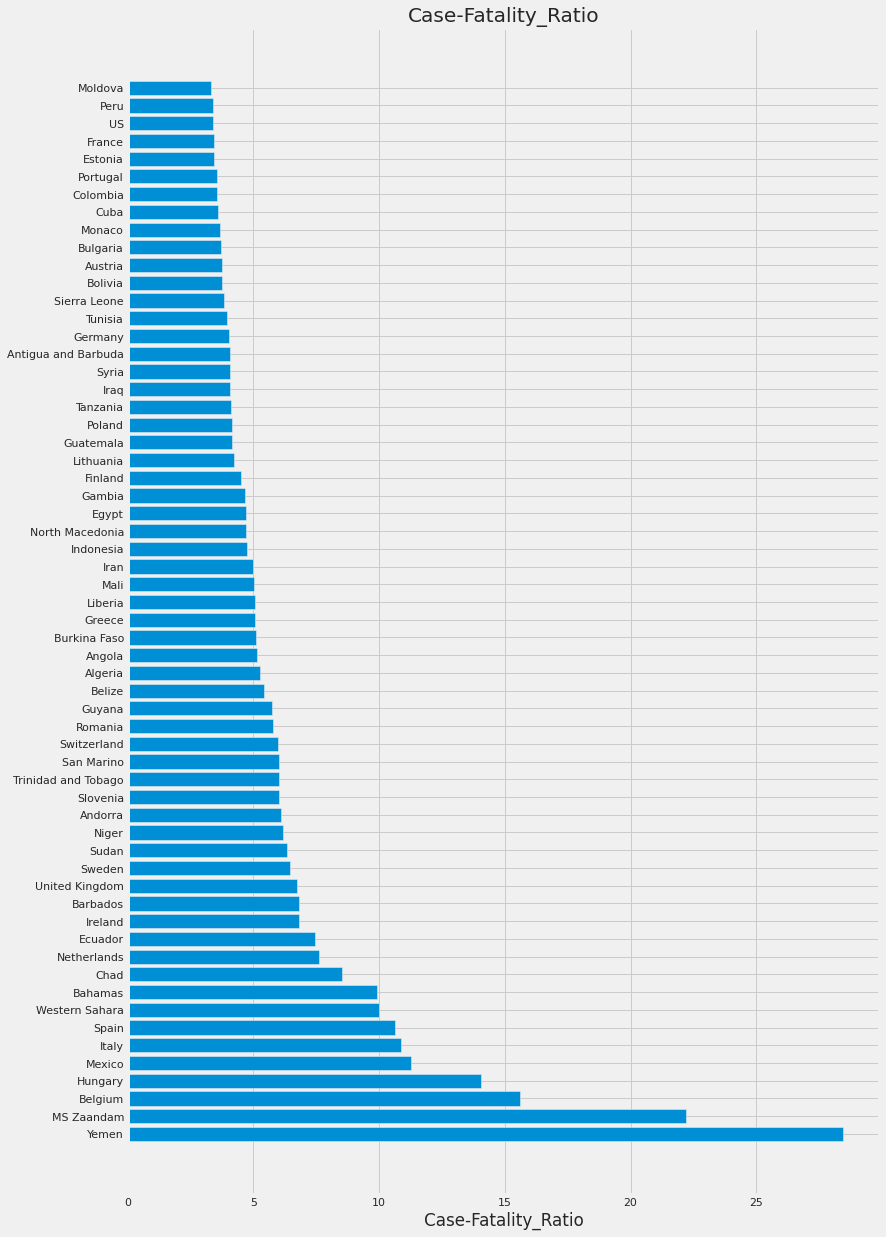

In [70]:
# Plotting Incident Rate
figsize(12, 20)

# Bar chart of People Tested 
plt.style.use('fivethirtyeight')
Xy = world_cases_country[['Case-Fatality_Ratio']].copy()

Xy.sort_values(by = 'Case-Fatality_Ratio', na_position='first', ascending = False, inplace = True)
Xy = Xy[:60]

plt.barh(Xy.index, Xy['Case-Fatality_Ratio'] )
plt.xlabel('Case-Fatality_Ratio') 
plt.title('Case-Fatality_Ratio')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1259: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/_kernel_base.py:516: RuntimeWarning: invalid value encountered in true_divide
  dens = Kval.prod(axis=1) / np.prod(bw[iscontinuous])
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1483: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/usr/local/lib/python3.6/dist-packages/

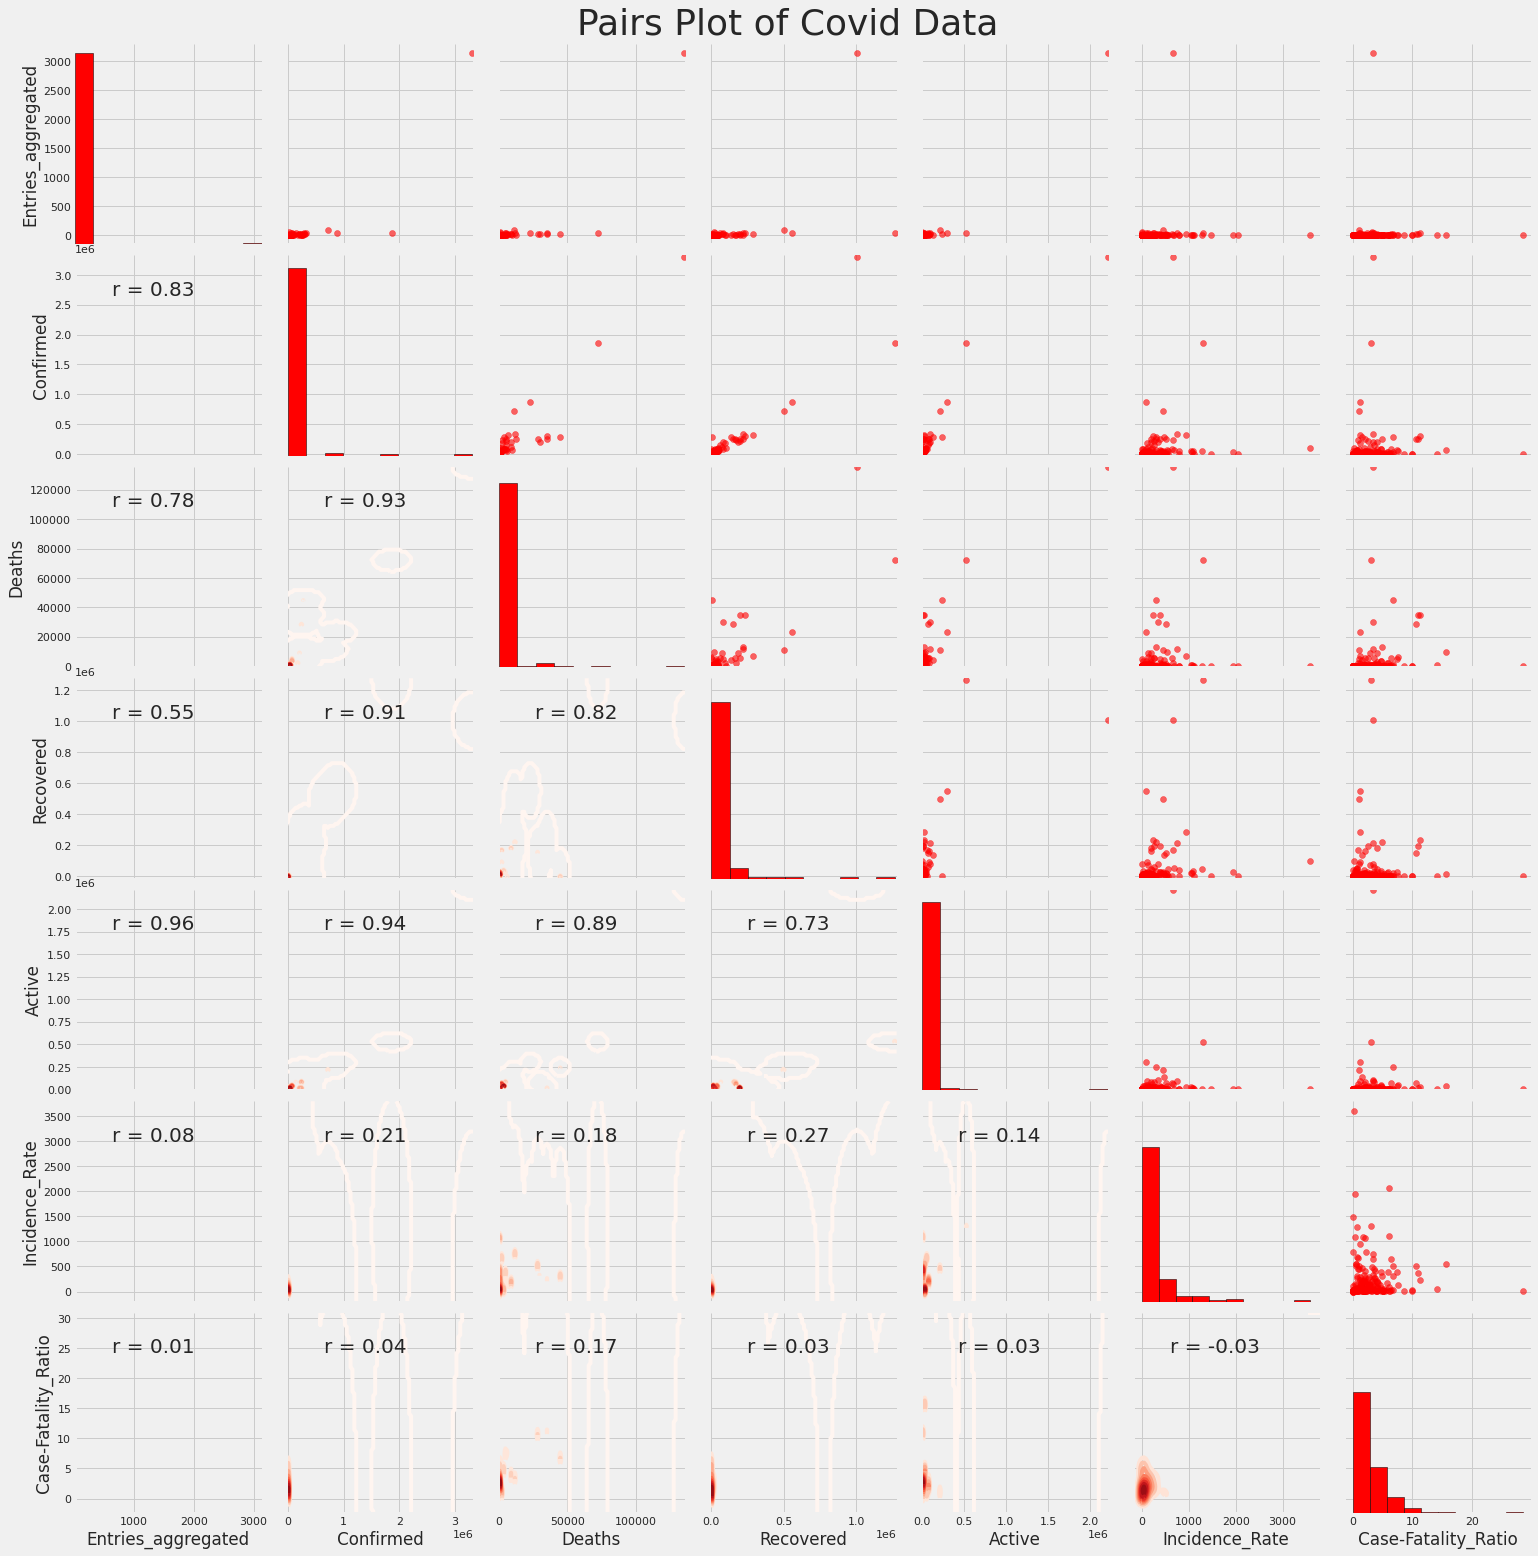

In [71]:
# Extract the columns to  plot
plot_data = world_cases_country


# Drop na values
plot_data = plot_data.dropna()

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3)

# Upper is a scatter plot
grid.map_upper(plt.scatter, color = 'red', alpha = 0.6)

# Diagonal is a histogram
grid.map_diag(plt.hist, color = 'red', edgecolor = 'black')

# Bottom is correlation and density plot
grid.map_lower(corr_func);
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

# Title for entire plot
plt.suptitle('Pairs Plot of Covid Data', size = 36, y = 1.02);
